# Lecture 27 EEP118

# Today will be a review for the Final


Causal Effect of the Boeing door incident on company stock price, 

Causal Effect of “Trump” policies on companies’ stock pric, 


And then go over the Previous 'sy ear f exam
 







### Estimate Boeing door incident Effect on Stock Prices


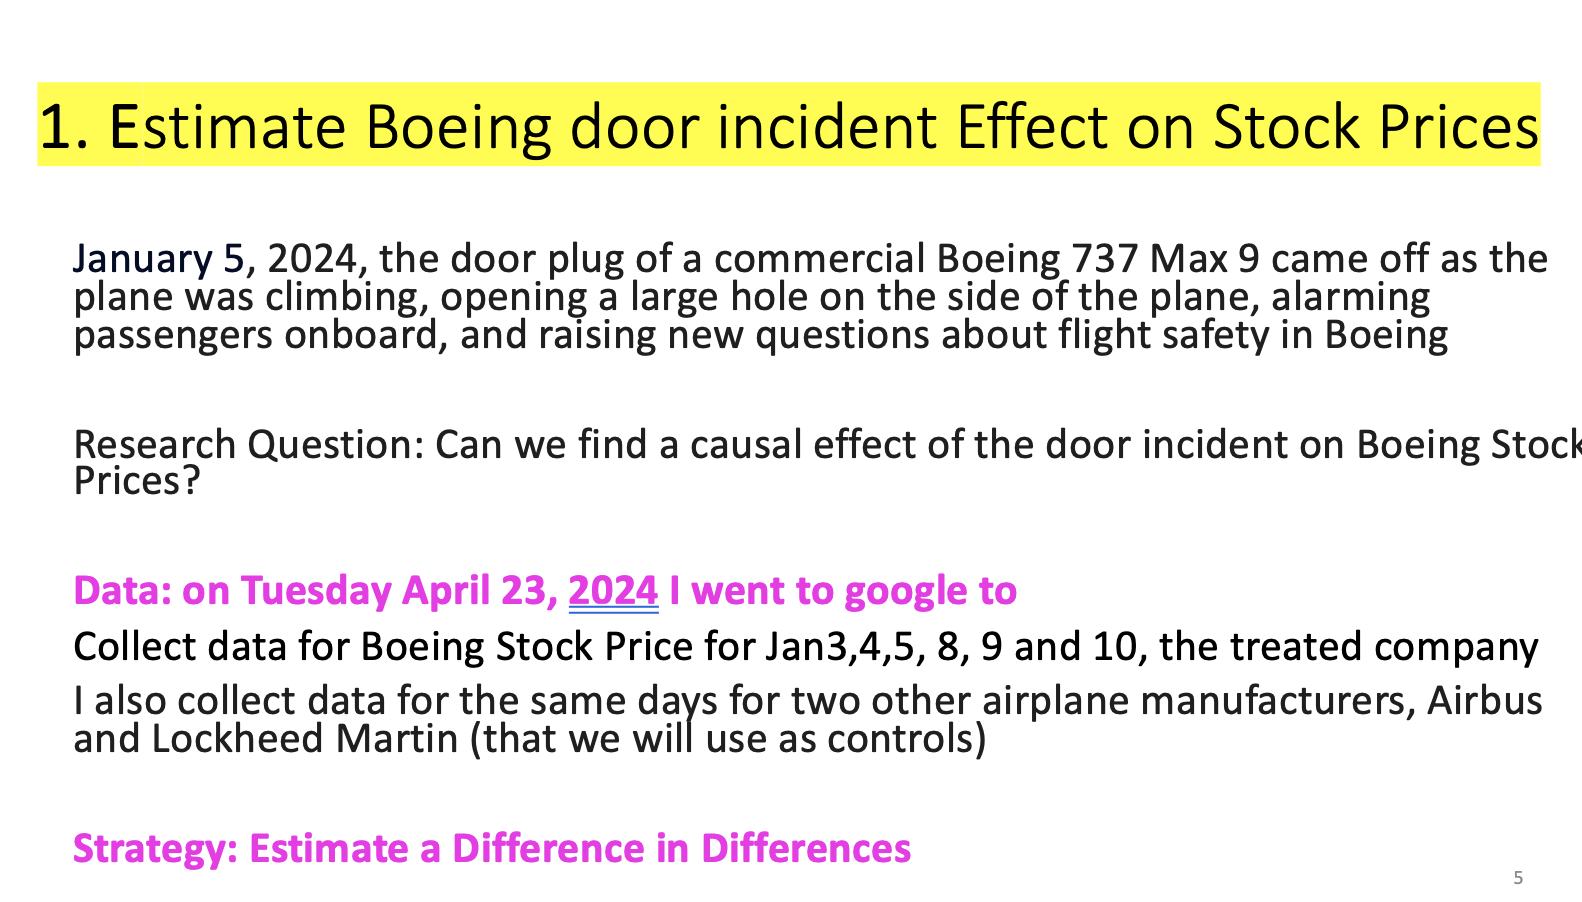

## Basic Model

The difference in differences models is


price_{i𝑡}= 𝛽_0+ 𝛽_1  AfterDoor+ 𝛽_2 DayTrend+ 𝛽_3 Boeing*AfterDoor_{i𝑡t} + Boeing_i +  Airbus_i + 𝑢_{𝑡i}



where Boeing_i=1 if the price at day t is for Boeing and equal to Zero otherwise,

AfterDoor=1 if we are on Jan 8,9, or 10 for all brands

And we include a Boeing and an Airbus Fixed effect, not the Lockheed one because we also have a constant, so we can include all but one brand Fixed effect.

Airbus_i = 1 if the price at day t is for Airbus and equal to Zero otherwise,


beta_3 hat is going to be the estimate Dif in Dif coefficient

We will estimate the above equation in levels of prices in dollars and report the estimates in column (1) of the table below, and also estimate it for the log of price in column (2) of the table below.

Lets go





Gathering the Data needed

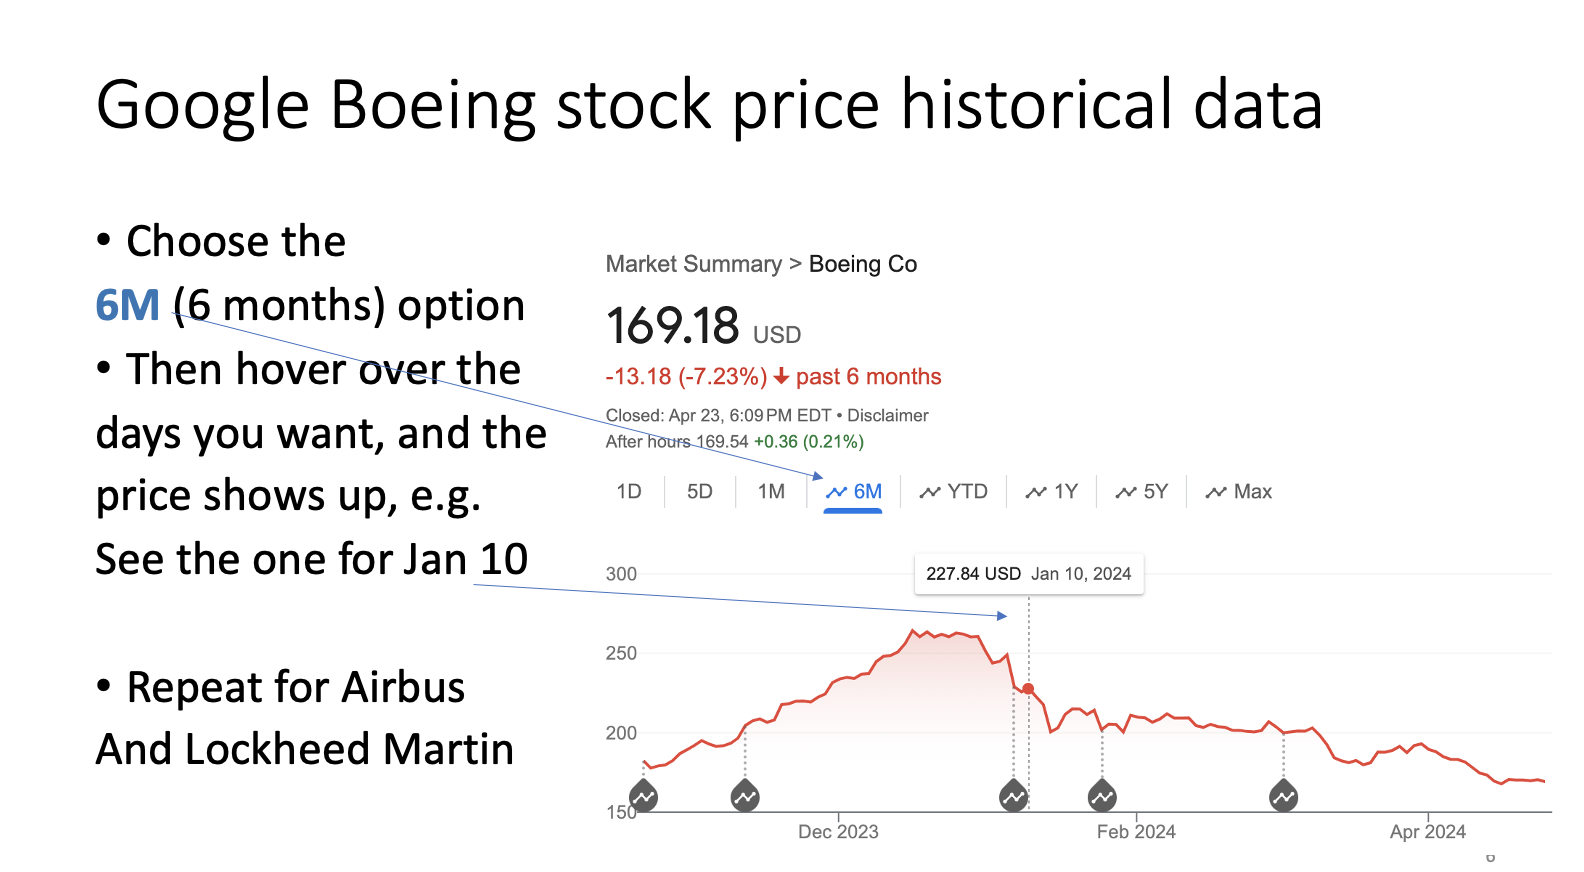

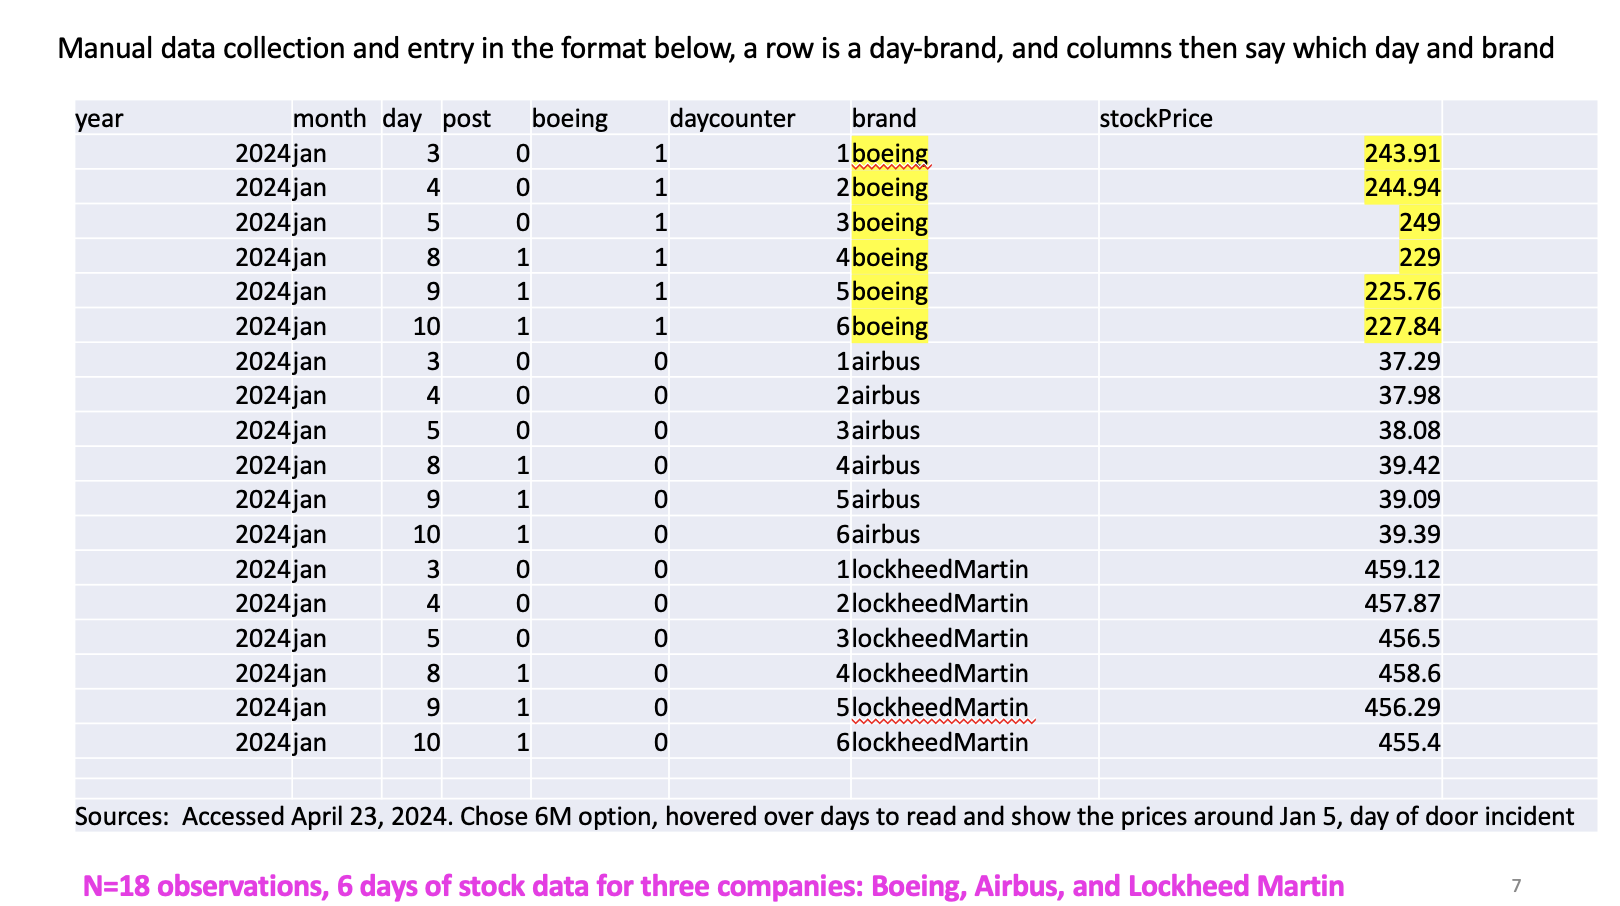

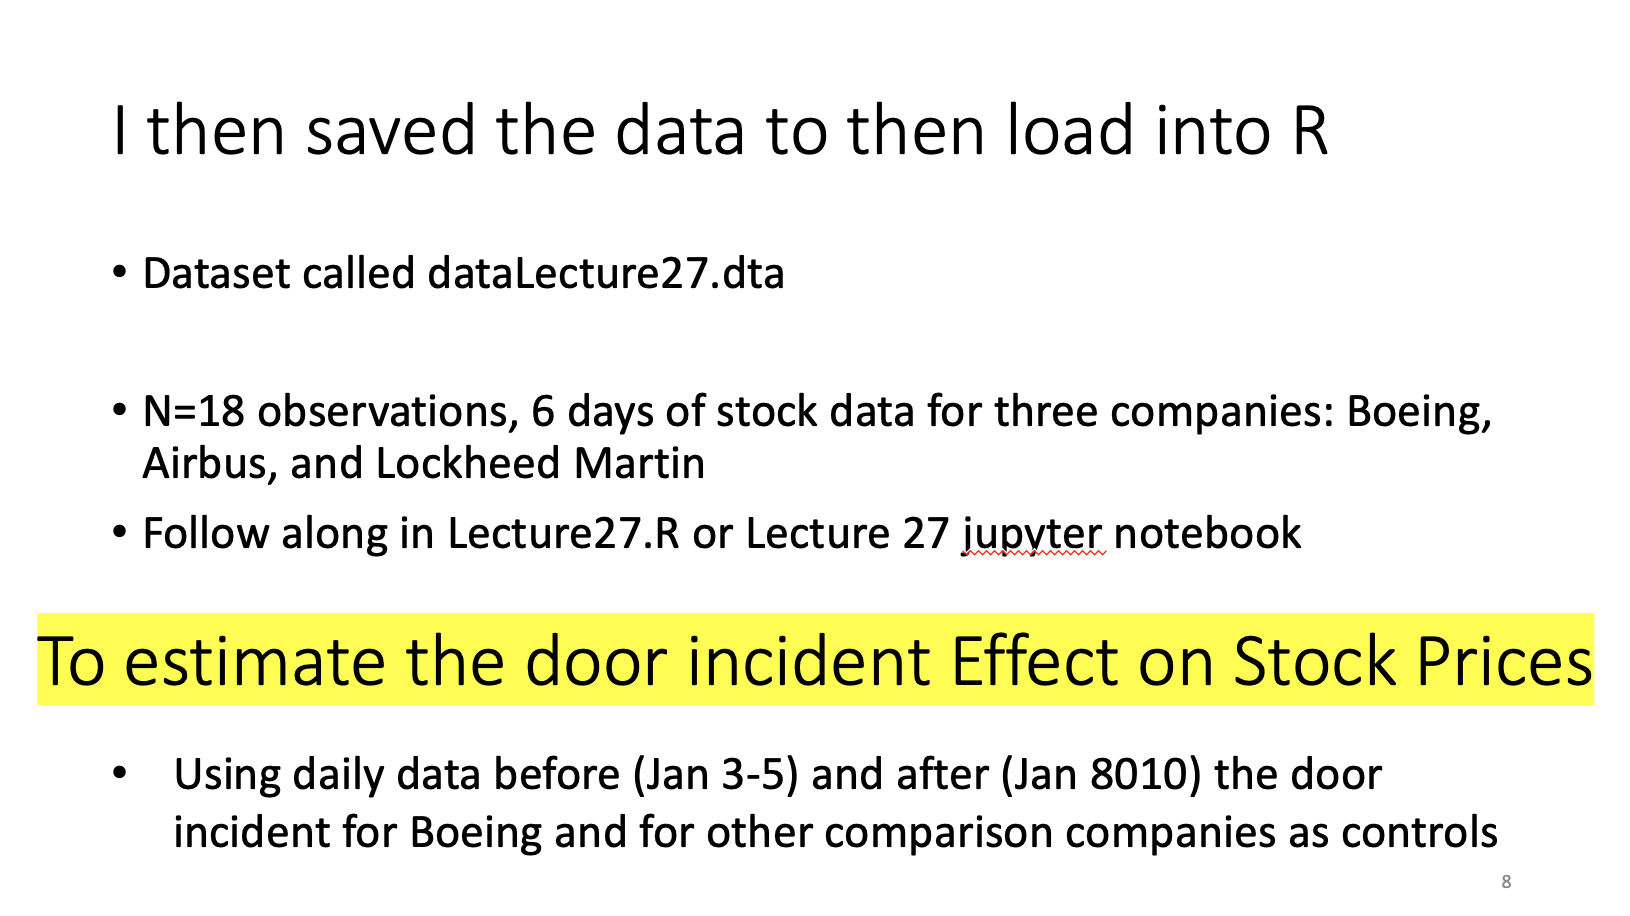

In [1]:

#load packages and load up the data


library(data.table)
library(dplyr)
library(ggplot2)
library(lubridate)
library(haven)
library(stargazer)
library(lfe)
library(gridExtra)
library(multcomp)







Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:data.table’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Please cite as: 


 Hlavac, Marek (2022). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.3. https://CRAN.R-project.org/package=stargazer 


Loading required package: Matrix


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Loading required package: mvtnorm

Loading required package: survival

Loading required package: TH.data

Loading r

In [2]:
##Reading in Stock Data

StockData <- read_dta("dataLecture27.dta")

head(StockData)

year,month,day,post,boeing,daycounter,brand,stockprice
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
2024,jan,3,0,1,1,boeing,243.91
2024,jan,4,0,1,2,boeing,244.94
2024,jan,5,0,1,3,boeing,249.00
2024,jan,8,1,1,4,boeing,229.00
2024,jan,9,1,1,5,boeing,225.76
2024,jan,10,1,1,6,boeing,227.84



Sources:  Accessed April 23, 2024. Chose 6M option, hovered over days to read and show the prices around Jan 5, day of door incident!



Boeing https://www.google.com/search?q=boeing+stock+price+history&rlz=1C5CHFA_enUS744US758&oq=boeing+stock+price&gs_lcrp=EgZjaHJvbWUqBwgBEAAYgAQyDAgAEEUYORixAxiABDIHCAEQABiABDIHCAIQABiABDIHCAMQABiABDIHCAQQABiABDIHCAUQABiABDIHCAYQABiABDIHCAcQABiABDIHCAgQABiABDIHCAkQABiABNIBCDc0MTdqMGo3qAIAsAIA&sourceid=chrome&ie=UTF-8#cso=chart-annotations-carousel:444

Airbus https://www.google.com/search?q=airbus+stock+price+history&sca_esv=5d0811d5ae0715ef&sca_upv=1&rlz=1C5CHFA_enUS744US758&ei=KjIoZqbvJLeDm9cP_5WfuAI&ved=0ahUKEwimrOq7rdmFAxW3weYEHf_KBycQ4dUDCBA&uact=5&oq=airbus+stock+price+history&gs_lp=Egxnd3Mtd2l6LXNlcnAiGmFpcmJ1cyBzdG9jayBwcmljZSBoaXN0b3J5MgsQABiABBiRAhiKBTILEAAYgAQYhgMYigUyCBAAGIAEGKIEMggQABiABBiiBDIIEAAYgAQYogQyCBAAGIAEGKIESJ8NUABYgAlwAHgBkAEAmAFroAGfBKoBAzQuMrgBA8gBAPgBAZgCBqACvQTCAgYQABgHGB7CAgUQABiABMICBxAAGIAEGA2YAwCSBwM0LjKgB4Uh&sclient=gws-wiz-serp


Lockheed Martin: https://www.google.com/search?q=lockheed+martin+stock+price+history&sca_esv=5d0811d5ae0715ef&sca_upv=1&rlz=1C5CHFA_enUS744US758&ei=0TIoZsynI7C-0PEP6vyNsA4&oq=loc+stock+price+history&gs_lp=Egxnd3Mtd2l6LXNlcnAiF2xvYyBzdG9jayBwcmljZSBoaXN0b3J5KgIIADIGEAAYBxgeMgYQABgHGB4yCBAAGAUYBxgeMgsQABiABBiGAxiKBTILEAAYgAQYhgMYigUyCxAAGIAEGIYDGIoFMgsQABiABBiGAxiKBTIIEAAYgAQYogQyCBAAGIAEGKIEMggQABiABBiiBEiXFFAAWN0EcAB4AZABAJgBY6ABigKqAQEzuAEByAEA-AEBmAIDoAKhAsICBxAAGIAEGA2YAwCSBwMyLjGgB78U&sclient=gws-wiz-serp#cso=chart-annotations-carousel:6







# Look at the Data First

Create an after Door Dummy and plot prices for all three stocks in three graphs


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


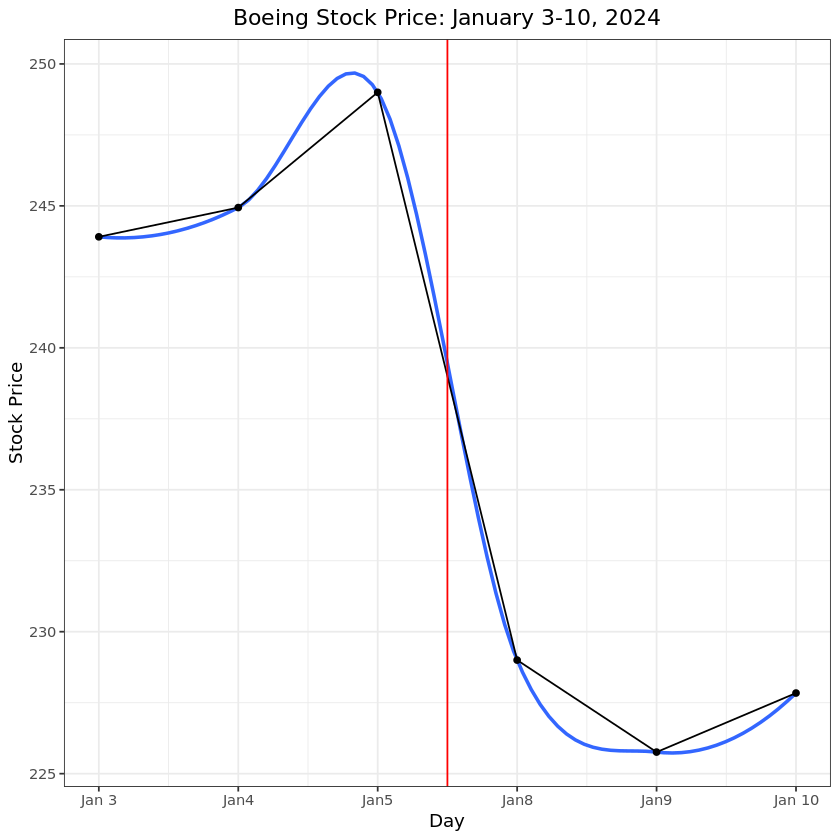

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


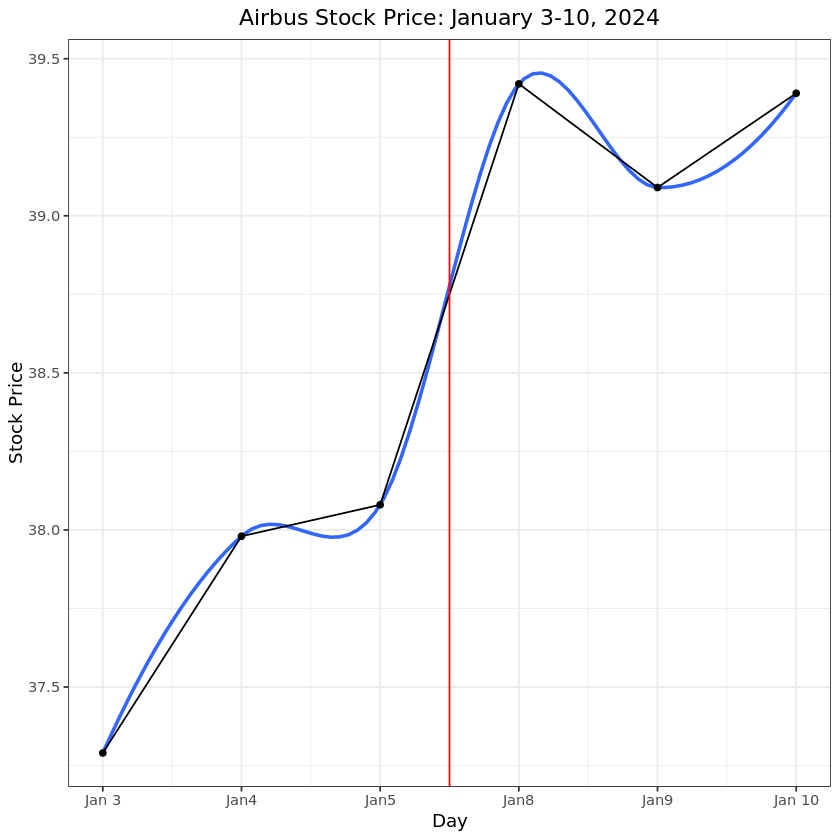

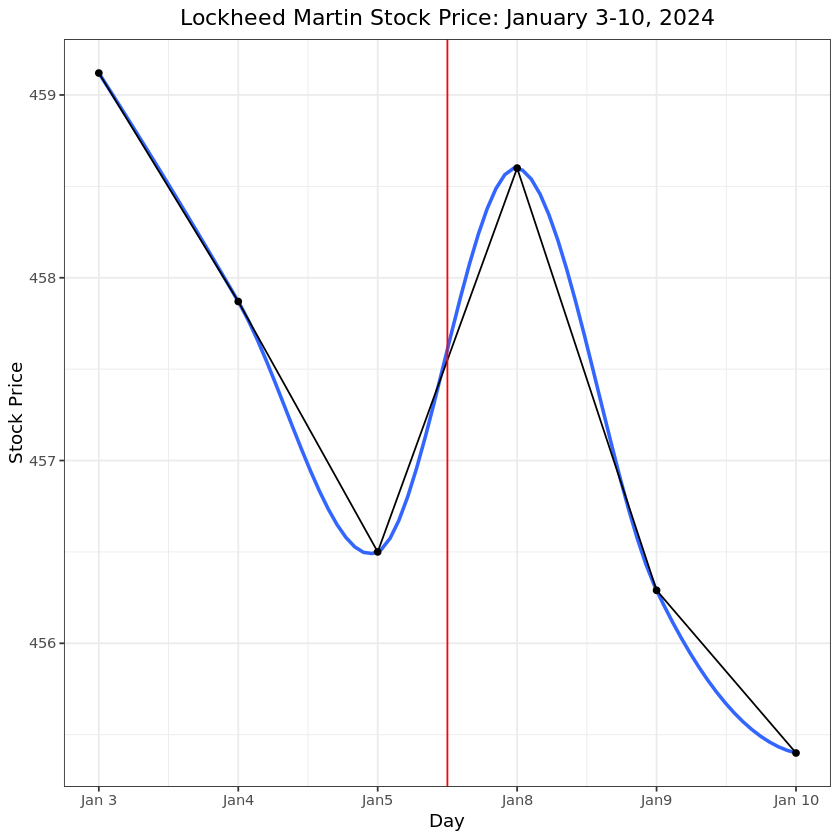

In [3]:

##Defining Post "Door" Dummy
StockData$PostDoor <- as.numeric(StockData$day >= 6)


##Boeing, Airbus, and Lockheed Martin Graphs
stockDataB<-filter(StockData,brand=="boeing")
stockDataA<-filter(StockData,brand=="airbus")
stockDataL<-filter(StockData,brand=="lockheedMartin")

BoeingPlot <- ggplot(stockDataB, aes(x = daycounter, y = stockprice))
BoeingPlot <- BoeingPlot + geom_smooth(se=FALSE) + geom_point() + geom_line(color="black") + geom_vline(xintercept=3.5, colour="Red")
BoeingPlot <- BoeingPlot + theme_bw() + theme(plot.title = element_text(hjust = 0.5)) + 
  scale_x_continuous(breaks=(seq(1,6,1)), labels=c("Jan 3", "Jan4", "Jan5", "Jan8", "Jan9", "Jan 10"))
BoeingPlot <- BoeingPlot + xlab("Day") + ylab("Stock Price") + ggtitle("Boeing Stock Price: January 3-10, 2024")

BoeingPlot

AirbusPlot <- ggplot(stockDataA, aes(x = daycounter, y = stockprice))
AirbusPlot <- AirbusPlot + geom_smooth(se=FALSE) + geom_point() + geom_line(color="black") + geom_vline(xintercept=3.5, colour="Red")
AirbusPlot <- AirbusPlot + theme_bw() + theme(plot.title = element_text(hjust = 0.5)) + 
  scale_x_continuous(breaks=(seq(1,6,1)), labels=c("Jan 3", "Jan4", "Jan5", "Jan8", "Jan9", "Jan 10"))
AirbusPlot <- AirbusPlot + xlab("Day") + ylab("Stock Price") + ggtitle("Airbus Stock Price: January 3-10, 2024")

AirbusPlot

LMPlot <- ggplot(stockDataL, aes(x = daycounter, y = stockprice))
LMPlot <- LMPlot + geom_smooth(se=FALSE) + geom_point() + geom_line(color="black") + geom_vline(xintercept=3.5, colour="Red")
LMPlot <- LMPlot + theme_bw() + theme(plot.title = element_text(hjust = 0.5)) + 
  scale_x_continuous(breaks=(seq(1,6,1)), labels=c("Jan 3", "Jan4", "Jan5", "Jan8", "Jan9", "Jan 10"))
LMPlot <- LMPlot + xlab("Day") + ylab("Stock Price") + ggtitle("Lockheed Martin Stock Price: January 3-10, 2024")

LMPlot


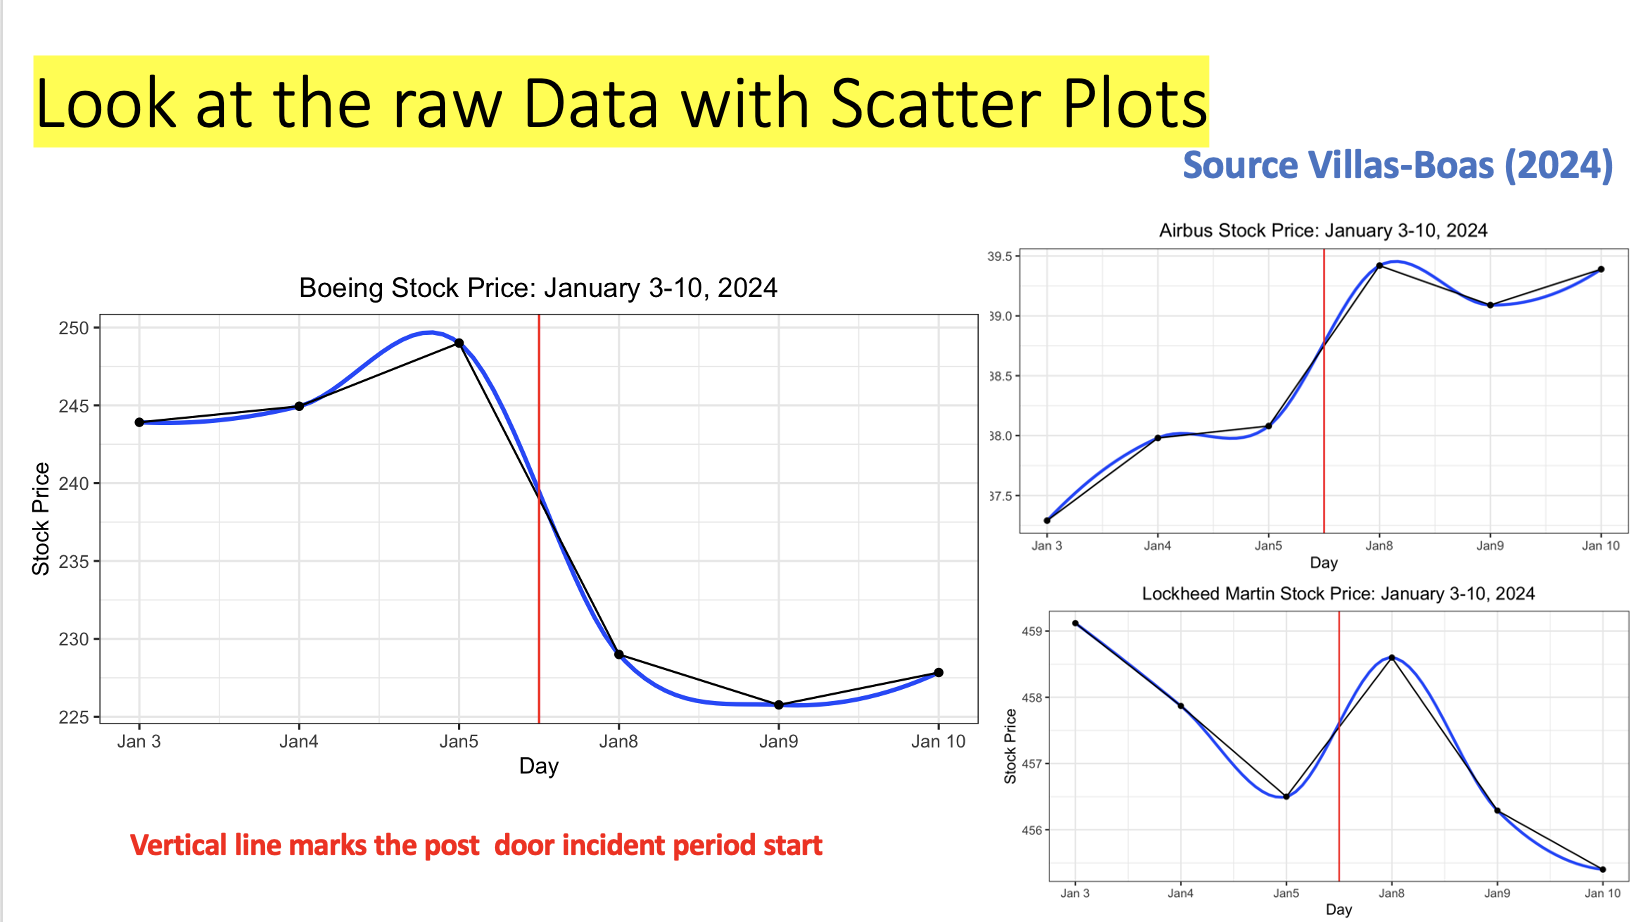

## Basic Model

The difference in differences models is


price_{i𝑡}= 𝛽_0+ 𝛽_1  AfterDoor+ 𝛽_2 DayTrend+ 𝛽_3 Boeing*AfterDoor_{i𝑡t} + Boeing_i +  Airbus_i + 𝑢_{𝑡i}



where Boeing_i=1 if the price at day t is for Boeing and equal to Zero otherwise,

AfterDoor=1 if we are on Jan 8,9, or 10 for all brands

And we include a Boeing and an Airbus Fixed effect, not the Lockheed one because we also have a constant, so we can include all but one brand Fixed effect.

Airbus_i = 1 if the price at day t is for Airbus and equal to Zero otherwise,


beta_3 hat is going to be the estimate Dif in Dif coefficient

We will estimate the above equation in levels of prices in dollars and report the estimates in column (1) of the table below, and also estimate it for the log of price in column (2) of the table below.

Lets go






In [4]:

##Running regression for all companies at same time, with brand fixed effect and a day trend

#dependent variable is log of Price
RegAllLogs <- felm(log(stockprice) ~ PostDoor:boeing + PostDoor + daycounter | brand , data = StockData)
summary(RegAllLogs)




Call:
   felm(formula = log(stockprice) ~ PostDoor:boeing + PostDoor +      daycounter | brand, data = StockData) 

Residuals:
      Min        1Q    Median        3Q       Max 
-0.021610 -0.006075 -0.002316  0.009923  0.015409 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
PostDoor         0.012766   0.013270   0.962    0.355    
daycounter       0.001921   0.003681   0.522    0.611    
PostDoor:boeing -0.096338   0.012750  -7.556 6.71e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01275 on 12 degrees of freedom
Multiple R-squared(full model): 0.9999   Adjusted R-squared: 0.9999 
Multiple R-squared(proj model): 0.8389   Adjusted R-squared: 0.7717 
F-statistic(full model):2.424e+04 on 5 and 12 DF, p-value: < 2.2e-16 
F-statistic(proj model): 20.83 on 3 and 12 DF, p-value: 4.764e-05 



In [5]:
#depedent variable is price
##Running regression for all companies at same time, with brand fixed effect and a day trend
RegAll <- felm(stockprice ~ PostDoor:boeing + PostDoor + daycounter | brand , data = StockData)
summary(RegAll)


Call:
   felm(formula = stockprice ~ PostDoor:boeing + PostDoor + daycounter |      brand, data = StockData) 

Residuals:
     Min       1Q   Median       3Q      Max 
-2.13417 -1.09187  0.07292  0.79396  3.14417 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
PostDoor          0.50751    1.75456   0.289    0.777    
daycounter       -0.09417    0.48663  -0.194    0.850    
PostDoor:boeing -18.64167    1.68573 -11.059  1.2e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.686 on 12 degrees of freedom
Multiple R-squared(full model): 0.9999   Adjusted R-squared: 0.9999 
Multiple R-squared(proj model): 0.9372   Adjusted R-squared: 0.9111 
F-statistic(full model):3.71e+04 on 5 and 12 DF, p-value: < 2.2e-16 
F-statistic(proj model): 59.71 on 3 and 12 DF, p-value: 1.747e-07 



#  make table with two columns


   

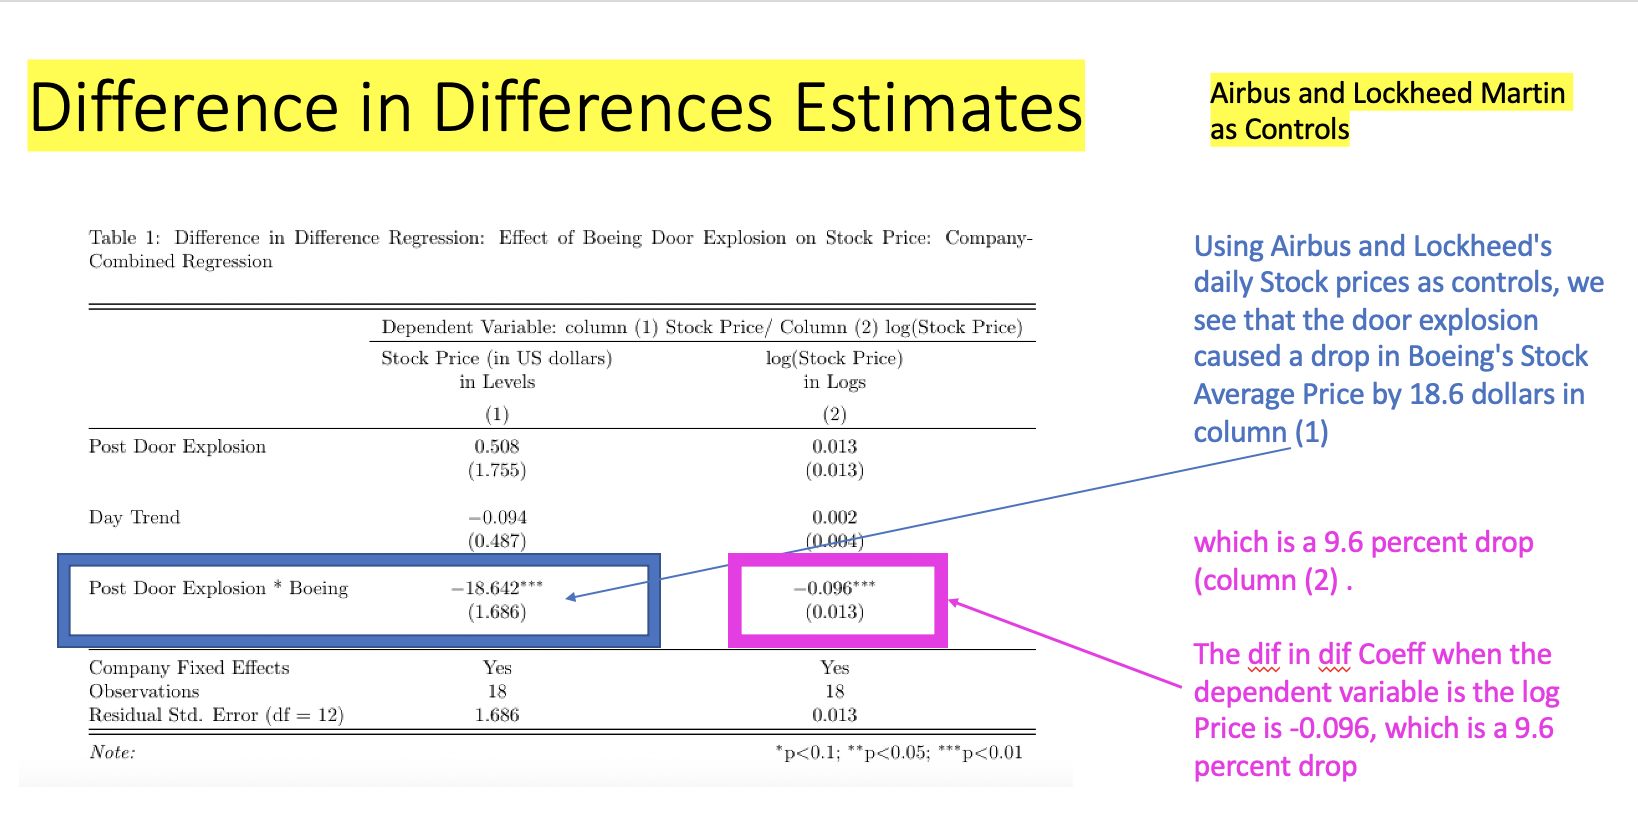